In [41]:
import importlib
import os
import logging
from params import Params
import params
importlib.reload(params)

#logging.basicConfig(encoding='utf-8', level=logging.DEBUG)
import embeddings_base
importlib.reload(embeddings_base)
from embeddings_base import embeddings_base
import use_wrapper
importlib.reload(use_wrapper)
from use_wrapper import use_wrapper

from source_file_iterator import SourceFileIterator
import source_file_iterator
importlib.reload(source_file_iterator)
model_filename = "universal-sentence-encoder-multilingual-large_3" 
#modelname = 'RWKV-4-Raven-3B-v11-Eng49%-Chn49%-Jpn1%-Other1%-20230429-ctx4096.pth'
tokenizer_name = '20B_tokenizer.json' 
os.environ["RWKV_CUDA_ON"] = '1'
#r = rwkv(modelname,
#         '20B_tokenizer.json',
#         model_load=False)
u = use_wrapper(model_filename, tokenizer_name, model_load = True) 

embeddings_base_logger= <Logger embeddings_base (INFO)>
logger= <Logger use_wrapper (INFO)>
INFO: 2023-08-31 18:51:03,709 - use_wrapper.__init__ - initializing USE (use_wrapper.py:49)
<class 'tokenizers.Tokenizer'>
INFO: 2023-08-31 18:51:07,735 - absl.load_partial - Fingerprint not found. Saved model loading will continue. (load.py:1071)
module https://tfhub.dev/google/universal-sentence-encoder/4 loaded
tokenizer class= <class 'tokenizers.Tokenizer'>
INFO: 2023-08-31 18:51:07,808 - use_wrapper.__init__ - cache_filename=use_gutenberg (use_wrapper.py:73)
key_prefix= use_wrapper:universal-sentence-encoder-multilingual-large_3:Tokenizer


data_subdirs= ['carroll', 'einstein', 'lovecraft']
numTokensList= [1024, 2048, 4096, 8192, 16384]
INFO: 2023-08-29 17:10:38,849 - use_wrapper.getPersistenceDiagramEmbeddings - PD embedding cache(emb:file=./data/carroll/Through the Looking-Glass by Lewis Carroll:embFunc=getPersistenceDiagramEmbeddings:tokens=1024) found (use_wrapper.py:208)
INFO: 2023-08-29 17:10:38,850 - use_wrapper.getPersistenceDiagramEmbeddings - elapsed = 0.0018956661224365234 (use_wrapper.py:224)
INFO: 2023-08-29 17:10:38,867 - use_wrapper.getPersistenceDiagramEmbeddings - PD embedding cache(emb:file=./data/carroll/Through the Looking-Glass by Lewis Carroll:embFunc=getPersistenceDiagramEmbeddings:tokens=2048) found (use_wrapper.py:208)
INFO: 2023-08-29 17:10:38,869 - use_wrapper.getPersistenceDiagramEmbeddings - elapsed = 0.0014183521270751953 (use_wrapper.py:224)
INFO: 2023-08-29 17:10:38,885 - use_wrapper.getPersistenceDiagramEmbeddings - PD embedding cache(emb:file=./data/carroll/Through the Looking-Glass by Le

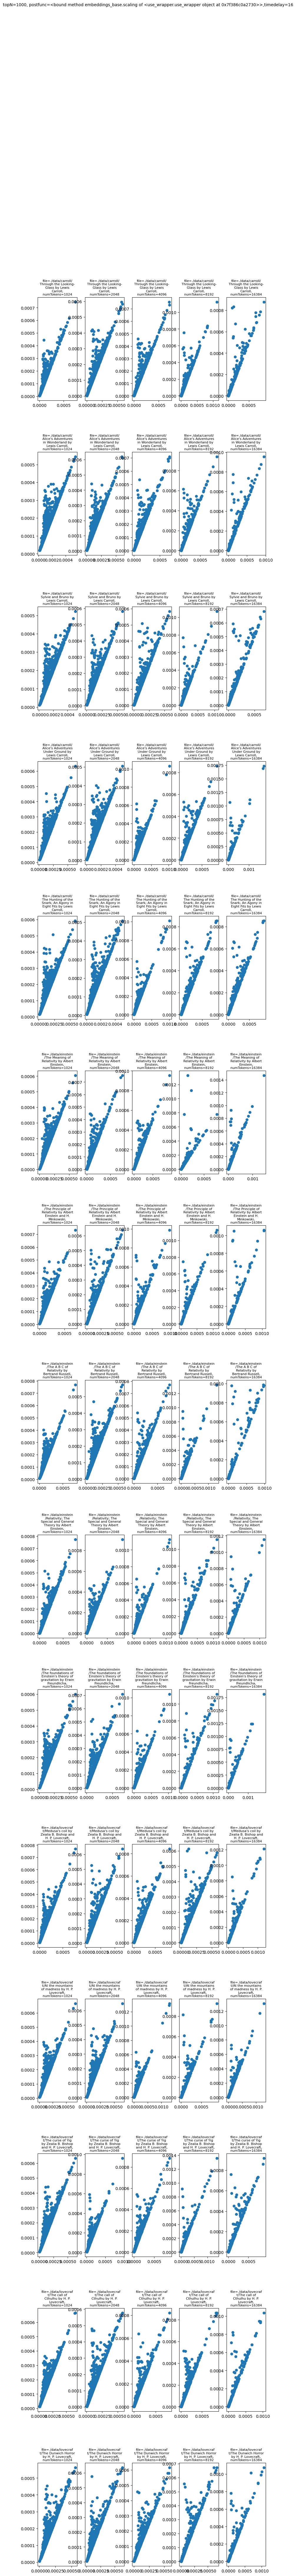

In [7]:
u.all_pd_plot()

## tsne.pyで収集した，rwkvベクトルからtsneしたベクトルの可視化

./data/carroll/Through the Looking-Glass by Lewis Carroll
./data/carroll/Alice's Adventures in Wonderland by Lewis Carroll
./data/carroll/Sylvie and Bruno by Lewis Carroll
./data/carroll/Alice's Adventures Under Ground by Lewis Carroll
./data/carroll/The Hunting of the Snark; An Agony in Eight Fits by Lewis Carroll
./data/einstein/The Meaning of Relativity by Albert Einstein
./data/einstein/The Principle of Relativity by Albert Einstein and H. Minkowski
./data/einstein/The A B C of Relativity by Bertrand Russell
./data/einstein/Relativity; The Special and General Theory by Albert Einstein
./data/einstein/The foundations of Einstein's theory of gravitation by Erwin Freundlicha
./data/lovecraft/Medusa's coil by Zealia B. Bishop and H. P. Lovecraft
./data/lovecraft/At the mountains of madness by H. P. Lovecraft
./data/lovecraft/The curse of Yig by Zealia B. Bishop and H. P. Lovecraft
./data/lovecraft/The call of Cthulhu by H. P. Lovecraft
./data/lovecraft/The Dunwich Horror by H. P. Lovec

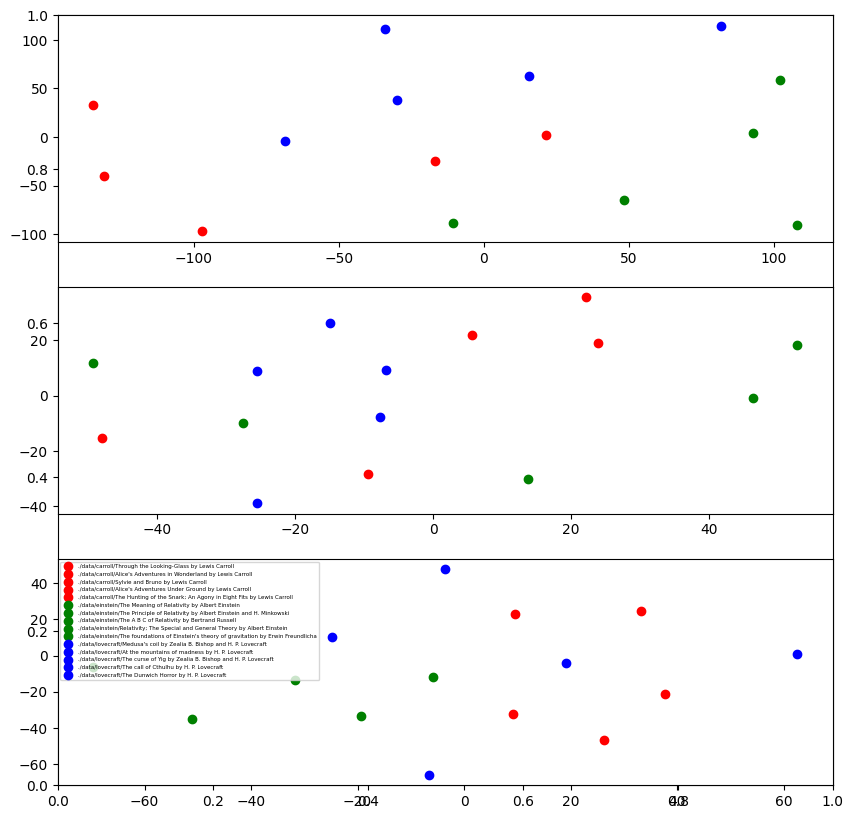

In [38]:
import pickle
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
colors =  ["r", "g", "b", "c", "m", "y", "k", "orange","pink"]
getFunc = "getRwkvEmbeddings"
for numTokensNo, numTokens in enumerate([1024, 2048, 4096]):
    ax = fig.add_subplot(3, 1, numTokensNo+1)
    tsne_filename = f"tsne-{getFunc}-{numTokens}.pickle"
    names_filename = f"tsne-{numTokens}-names.pickle"
    names = []
    with open(names_filename, mode="rb") as f:
        names = pickle.load(f)
    with open(tsne_filename, mode="rb") as f:
        tsne=pickle.load(f)
        for i, name in enumerate(names):
            print(name)
            c = colors[i // 5]
            ax.scatter(tsne[i][0], tsne[i][1], label = name, color=c)
plt.legend(fontsize = 4)

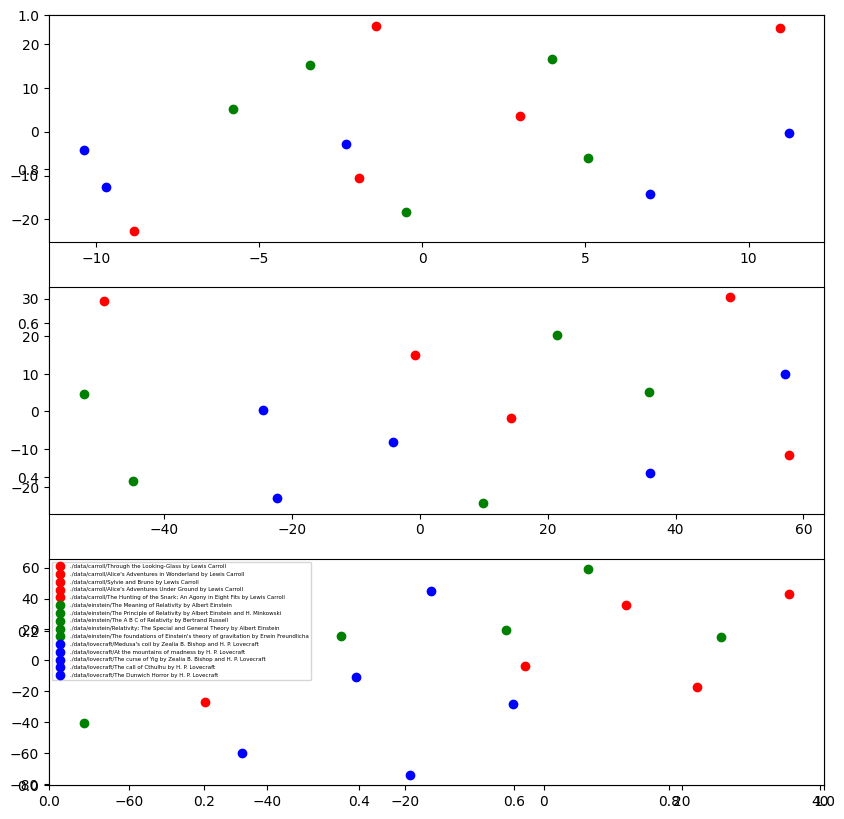

In [42]:
import pickle
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
colors =  ["r", "g", "b", "c", "m", "y", "k", "orange","pink"]
getFunc = "getHeadPersistenceDiagramEmbeddings"
for numTokensNo, numTokens in enumerate([1024, 2048, 4096]):
    ax = fig.add_subplot(3, 1, numTokensNo+1)
    tsne_filename = f"tsne-{getFunc}-{numTokens}.pickle"
    names_filename = f"tsne-{numTokens}-names.pickle"
    names = []
    with open(names_filename, mode="rb") as f:
        names = pickle.load(f)
    with open(tsne_filename, mode="rb") as f:
        tsne=pickle.load(f)
        for i, name in enumerate(names):
            #print(name)
            c = colors[i // 5]
            ax.scatter(tsne[i][0], tsne[i][1], label = name, color=c)
            #ax.scatter(tsne[i], tsne[i], label = name, color=c)
plt.legend(fontsize = 4)